In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV

In [2]:
#Load the dataset
data = pd.read_table("smsdata.txt", header=None)
data.head()

,0,1
0,good,"Go until jurong point, crazy.. Available only ..."
1,good,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,good,U dun say so early hor... U c already then say...
4,good,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# rename the column header
data.columns = ["label", "message"]
data.head()

,label,message
0,good,"Go until jurong point, crazy.. Available only ..."
1,good,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,good,U dun say so early hor... U c already then say...
4,good,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# converting labels to numeric labels
# good = 0 and spam = 1
data['label_num']=data.label.map({'good':0,'spam':1})
data.head()

,label,message,label_num
0,good,"Go until jurong point, crazy.. Available only ...",0
1,good,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,good,U dun say so early hor... U c already then say...,0
4,good,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
# calculating the length of all the messages
data['char_count']=data['message'].apply(len)

In [6]:
data['digit_count'] = data['message'].apply(lambda x: len([w for w in x.split() for y in w if y.isdigit()]))

In [7]:
from string import punctuation
punctuations = " ".join(punctuation)
print(punctuations)
data['punctuation_count'] = data['message'].apply(lambda x: len([w for w in x.split() for y in w if y in punctuations]))

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~


In [8]:
data['word_count'] = data['message'].apply(lambda x: len([w for w in x.split(' ')]))

In [9]:
data['upperchar_count'] = data['message'].apply(lambda x: len([w for w in x.split() for y in w if y.isupper()]))

In [10]:
data.head()

,label,message,label_num,char_count,digit_count,punctuation_count,word_count,upperchar_count
0,good,"Go until jurong point, crazy.. Available only ...",0,111,0,9,20,3
1,good,Ok lar... Joking wif u oni...,0,29,0,6,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,25,6,28,10
3,good,U dun say so early hor... U c already then say...,0,49,0,6,11,2
4,good,"Nah I don't think he goes to usf, he lives aro...",0,61,0,2,13,2


In [13]:
target = data.label_num
predvar = data[["char_count", "word_count", "punctuation_count", "digit_count", "upperchar_count"]]

In [14]:
# standardize predictors to have mean=0 and sd=1
predictors=predvar.copy()
from sklearn import preprocessing
predictors['char_count']=preprocessing.scale(predictors['char_count'].astype('float64'))
predictors['word_count']=preprocessing.scale(predictors['word_count'].astype('float64'))
predictors['punctuation_count']=preprocessing.scale(predictors['punctuation_count'].astype('float64'))
predictors['digit_count']=preprocessing.scale(predictors['digit_count'].astype('float64'))
predictors['upperchar_count']=preprocessing.scale(predictors['upperchar_count'].astype('float64'))

In [15]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123)

In [16]:
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

In [17]:
# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'char_count': 0.20379076930104198,
 'word_count': -0.15949320225906388,
 'punctuation_count': -0.03584827268037189,
 'digit_count': 0.2541934933909754,
 'upperchar_count': 0.014618328192111583}

**The above shows that all features are used in the model since none of the regression coefficients = 0**

C:\Users\User\anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\User\anaconda3.1\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

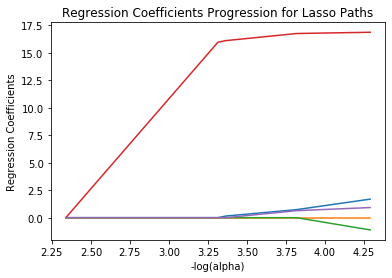

In [18]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

C:\Users\User\anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\User\anaconda3.1\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0.5, 1.0, 'Mean squared error on each fold')

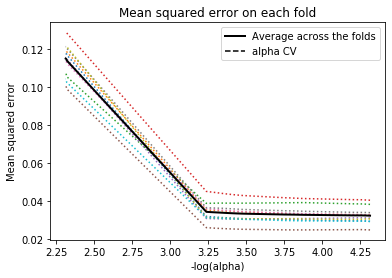

In [20]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [21]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
0.031176485719234807
test data MSE
0.031529084642383395


In [22]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.7288785789285708
test data R-square
0.7342392674398699
